In [1]:
# import required liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV , cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import xlrd
import pickle
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("C:\\Users\\skalk\\Downloads\\global-power-plant-database-master\\global-power-plant-database-master\\source_databases_csv\\database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [4]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [39]:
# drop rows with missing values in relevant columns
df=df.dropna(subset=['capacity_mw','primary_fuel','latitude','longitude','commissioning_year','country'])

In [40]:
#Encode the target variable
label_encoder=LabelEncoder()
df['primary_fuel']=label_encoder.fit_transform(df['primary_fuel'])

<AxesSubplot:>

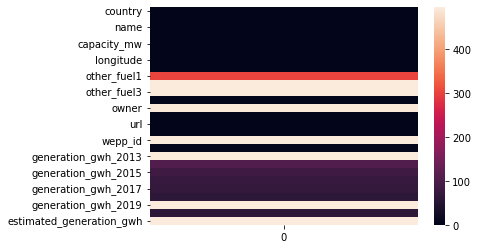

In [41]:
sns.heatmap(df.isnull().sum().to_frame())

In [42]:
print(df.isnull().sum())

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                      0
longitude                     0
primary_fuel                  0
other_fuel1                 303
other_fuel2                 495
other_fuel3                 496
commissioning_year            0
owner                       492
source                        0
url                           0
geolocation_source            0
wepp_id                     496
year_of_capacity_data         4
generation_gwh_2013         496
generation_gwh_2014         104
generation_gwh_2015          82
generation_gwh_2016          72
generation_gwh_2017          68
generation_gwh_2018          60
generation_gwh_2019         496
generation_data_source       59
estimated_generation_gwh    496
dtype: int64


<AxesSubplot:xlabel='country', ylabel='primary_fuel'>

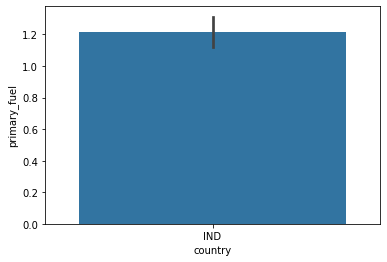

In [43]:
sns.barplot(x='country',y='primary_fuel',data=df)

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

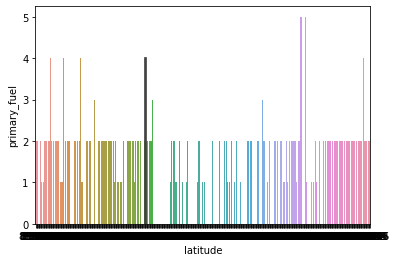

In [44]:
sns.barplot(x='latitude',y='primary_fuel',data=df)

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

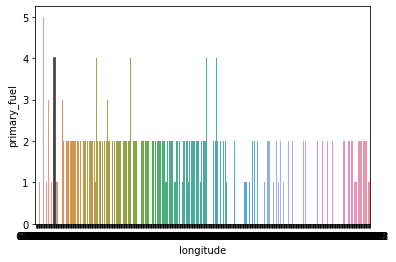

In [45]:
sns.barplot(x='longitude',y='primary_fuel',data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

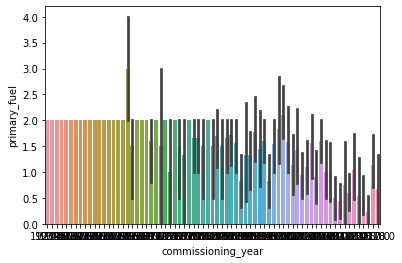

In [46]:
sns.barplot(x='commissioning_year',y='primary_fuel',data=df)

<AxesSubplot:xlabel='country', ylabel='primary_fuel'>

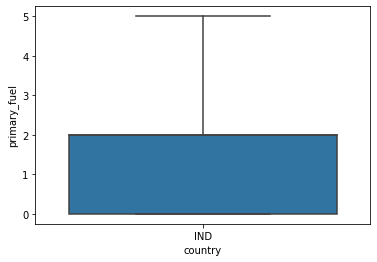

In [47]:
sns.boxplot(x="country", y="primary_fuel", data=df)

<AxesSubplot:xlabel='latitude', ylabel='primary_fuel'>

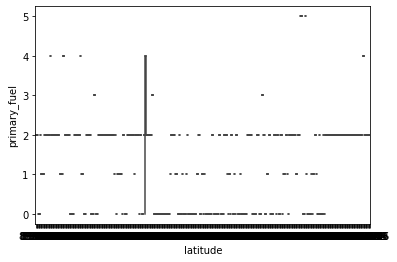

In [48]:
sns.boxplot(x="latitude", y="primary_fuel", data=df)

<AxesSubplot:xlabel='longitude', ylabel='primary_fuel'>

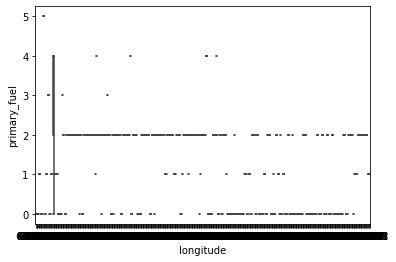

In [49]:
sns.boxplot(x="longitude", y="primary_fuel", data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='primary_fuel'>

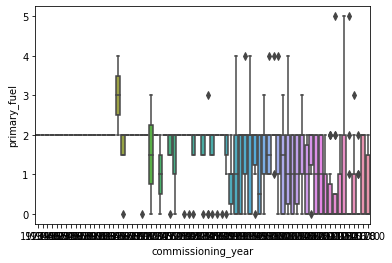

In [50]:
sns.boxplot(x="commissioning_year", y="primary_fuel", data=df)

In [51]:
#select features and target variable
features=['latitude','longitude','commissioning_year']
target=['primary_fuel']
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [52]:
#train the random forest classifier
rf_classifier=RandomForestClassifier(random_state=42)
rf_classifier.fit(x_train,y_train)
#make predictions
y_pred=rf_classifier.predict(x_test)
#evaluate the model
accuracy=accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.78


In [53]:
#hyperparameter tunning
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,5,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

In [54]:
#perform grid search cv
grid_search=GridSearchCV(estimator=rf_classifier,param_grid=param_grid,cv=5)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [55]:
#print the best parameters
print("Best Parameters:",grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
#make predictions with the tunned model
y_pred_tunned=grid_search.predict(x_test)


In [58]:
#Evaluate the tuned model
accuracy_tuned=accuracy_score(y_test,y_pred_tunned)
print("Tuned Model Accuracy:",accuracy_tuned)

Tuned Model Accuracy: 0.78
